<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           42 non-null     int64  
 1   Hole Area      42 non-null     float64
 2   Minimum Ozone  42 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 1.1 KB
None
   Year  Hole Area  Minimum Ozone
0  1979        0.1          225.0
1  1980        1.4          203.0
2  1981        0.6          209.5
3  1982        4.8          185.0
4  1983        7.9          172.9
Mean Absolute Error (MAE): 5.805765260712701
Root Mean Squared Error (RMSE): 7.246286618656351


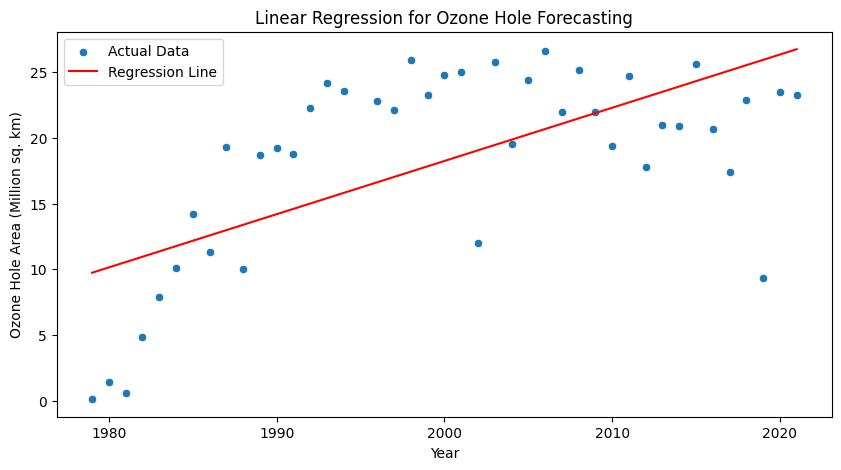

Future Predictions:
   Year  Predicted Hole Area
0  2025            28.369500
1  2026            28.774673
2  2027            29.179846
3  2028            29.585019
4  2029            29.990192
5  2030            30.395364
6  2031            30.800537
7  2032            31.205710
8  2033            31.610883
9  2034            32.016056


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
file_path = "/content/OzoneHole_Data.csv"  # Update the file path if necessary
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())

# Extract features and target variable
X = df[['Year']]
y = df['Hole Area']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

# Print evaluation metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Visualize the results
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df["Year"], y=df["Hole Area"], label="Actual Data")
sns.lineplot(x=df["Year"], y=model.predict(X), color="red", label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Ozone Hole Area (Million sq. km)")
plt.title("Linear Regression for Ozone Hole Forecasting")
plt.legend()
plt.show()

# Future prediction example (optional)
future_years = pd.DataFrame({'Year': range(2025, 2035)})
future_predictions = model.predict(future_years)
print("Future Predictions:")
print(pd.DataFrame({'Year': future_years['Year'], 'Predicted Hole Area': future_predictions}))
